In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import SVD, Dataset, accuracy, Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [2]:
algo = SVD()
reader = Reader(name=None,
                line_format='user item rating',
                sep=',',
                rating_scale=(1,5),
                skip_lines=1)
datacsv = Dataset.load_from_file('../data/movies/ratings.csv', reader=reader)

In [3]:
# cv returns a dictionary with many result keys
svd_cv = cross_validate(algo, datacsv, measures=['RMSE', 'MAE'], cv=5, 
                        n_jobs=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8947  0.8950  0.8967  0.9017  0.8985  0.8973  0.0026  
MAE (testset)     0.6901  0.6887  0.6899  0.6972  0.6891  0.6910  0.0031  
Fit time          4.24    4.53    4.46    4.15    3.59    4.19    0.33    
Test time         0.14    0.15    0.14    0.12    0.10    0.13    0.02    


In [4]:
svd_cv

{'test_rmse': array([0.89468871, 0.89499052, 0.89667935, 0.90166536, 0.89846161]),
 'test_mae': array([0.69014553, 0.68865007, 0.68985108, 0.69718893, 0.68914297]),
 'fit_time': (4.2373833656311035,
  4.532073020935059,
  4.458219766616821,
  4.147480487823486,
  3.587899923324585),
 'test_time': (0.13789987564086914,
  0.15208721160888672,
  0.14011096954345703,
  0.11738181114196777,
  0.09567499160766602)}

In [6]:
svd_cv['test_rmse'].mean()

0.8972971097491087

In [8]:
dfr = pd.read_csv('../data/movies/ratings.csv')

In [11]:
trainset, testset = train_test_split(datacsv, test_size=0.20)

In [12]:
algo = SVD()
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8991


0.8990657981363801

In [36]:
# type(predictions) # is a list
# type(predictions[0]) # is a surprise Prediction
# len(predictions) # is 20001 long
predictions[0][3] # 3rd list index is the rating prediction (float)
predictions[0][2] # 2nd list indes is the true rating (float)

4.5

In [38]:
listpredict = [row[3] for row in predictions]
listrating = [row[2] for row in predictions]
listrating[:5]
listpredict[:5]

[4.278361610903054,
 3.2578036354191173,
 4.083501862128913,
 3.4515445738119137,
 2.294592432448964]

In [53]:
df_violin = pd.DataFrame(listrating, columns=['rating'])
df_violin['prediction'] = pd.Series(listpredict)
df_violin.head()
np.max(df_violin.prediction.values)

5.0

In [43]:
# making list of arrays associated with ratings 1-5
violindata = [df_violin['prediction'][df_violin['rating'] == rating].values for rating in range(1, 6)]

In [59]:
plt.style.use("seaborn-whitegrid")

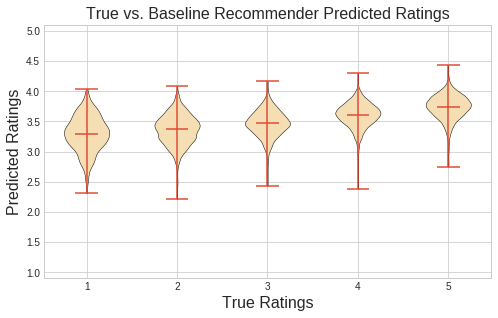

In [138]:
fig, ax = plt.subplots(figsize=(7,4.5))
parts = ax.violinplot(violindata, range(1,6), showmeans=True)
# ax.violinplot(violindata, range(1,6), showmeans=True, color='wheat') # color no work
plt.xlabel('True Ratings', fontsize=16)
plt.ylabel('Predicted Ratings', fontsize=16)
plt.ylim(0.9, 5.1)
plt.title('True vs. Baseline Recommender Predicted Ratings', fontsize=16)

for pc in parts['bodies']:
    pc.set_facecolor('wheat')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
fig.tight_layout(pad=1)
fig.savefig("../img/violin_means.png", dpi=100)
# cmap='cubehelix'

In [81]:
dfr.head()
# np.min(dfr.movieId.values)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [82]:
dfusercount = dfr.groupby('userId').count().drop(columns=['movieId', 'timestamp'])
dfmoviecount = dfr.groupby('movieId').count().drop(columns=['userId', 'timestamp'])

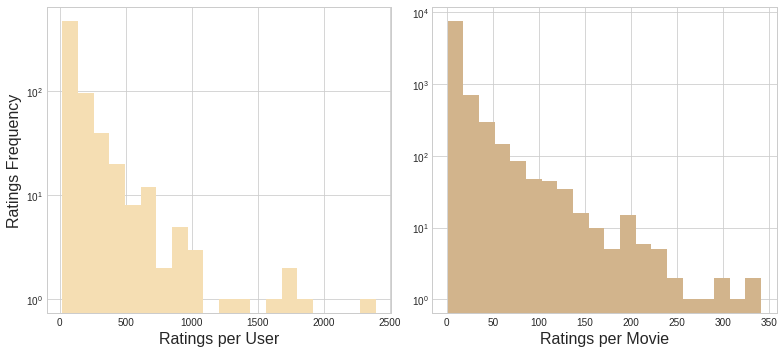

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,5))
# fig = plt.figure(figsize=(8,5))
# axuser = dfusercount.plot(kind='hist', figsize=(8,5), color='wheat')
ax[0].hist(dfusercount['rating'].values, bins=20, log=True, color='wheat')
ax[1].hist(dfmoviecount['rating'].values, bins=20, log=True, color='tan')
# ax[1].hist(dfmoviecount['rating'].values, bins=20)
# ax[0].set_title('Freq. of Ratings per User', fontsize=18)
# ax[1].set_title('Freq. of Ratings per Movie', fontsize=18)
ax[0].set_xlabel('Ratings per User', fontsize=16)
ax[1].set_xlabel('Ratings per Movie', fontsize=16)
ax[0].set_ylabel('Ratings Frequency', fontsize=16)
# plt.xlabel('No. User Ratings', fontsize=18)
# plt.ylabel('User Frequency', fontsize=18)
# plt.title('Freq. of Ratings per User & Freq. of Ratings per Movie', fontsize=18)
fig.tight_layout(pad=1)
fig.savefig("../img/counts_hist.png", dpi=100)

In [102]:
dfusercount['rating'].values[5]

44

In [126]:
from baselines import *

In [127]:
data = Dataset.load_builtin('ml-100k')
print("\nGlobal Mean...")
algo = GlobalMean()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("\nMeanOfMeans...")
algo = MeanofMeans()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Global Mean...
Evaluating RMSE, MAE of algorithm GlobalMean on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1231  1.1253  1.1318  1.1217  1.1264  1.1257  0.0035  
MAE (testset)     0.9418  0.9437  0.9504  0.9422  0.9454  0.9447  0.0031  
Fit time          0.03    0.06    0.06    0.06    0.07    0.06    0.01    
Test time         0.06    0.06    0.06    0.06    0.06    0.06    0.00    

MeanOfMeans...
Evaluating RMSE, MAE of algorithm MeanofMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0185  1.0183  1.0194  1.0149  1.0157  1.0174  0.0018  
MAE (testset)     0.8383  0.8395  0.8387  0.8352  0.8362  0.8376  0.0016  
Fit time          0.21    0.25    0.24    0.24    0.24    0.24    0.01    
Test time         0.76    0.24    0.22    0.21    0.23    0.33    0.22    


{'test_rmse': array([1.01851143, 1.01831655, 1.01944027, 1.01486049, 1.01572737]),
 'test_mae': array([0.83825827, 0.83946559, 0.83865692, 0.83523869, 0.83623625]),
 'fit_time': (0.20867252349853516,
  0.2498311996459961,
  0.24209308624267578,
  0.2430744171142578,
  0.24135684967041016),
 'test_time': (0.7633869647979736,
  0.23732566833496094,
  0.21990156173706055,
  0.21425414085388184,
  0.22614002227783203)}

In [128]:
algo = MeanofMeans()
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9566


0.9565668580602407

In [129]:
predictions[0]

Prediction(uid='156', iid='4262', r_ui=4.5, est=3.7737818539069736, details={'was_impossible': False})

In [130]:
listpredict = [row[3] for row in predictions]
listrating = [row[2] for row in predictions]
listrating[:5]
listpredict[:5]

[3.7737818539069736,
 3.3110212196111584,
 3.3953718316613357,
 3.5784222752140624,
 2.747855681100386]

In [131]:
df_violin = pd.DataFrame(listrating, columns=['rating'])
df_violin['prediction'] = pd.Series(listpredict)

In [132]:
violindata = [df_violin['prediction'][df_violin['rating'] == rating].values for rating in range(1, 6)]